<a href="https://colab.research.google.com/github/HowardHNguyen/Natural_Language_Processing-NLP/blob/main/Sentiment_Analysis_for_Vietnamese_using_fastText_methodology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a Textblob object from the sentence

In [1]:
from textblob import TextBlob

# Define the Sentiment Polarity

In [2]:
def add_sentiment_polarity(text):
  """
  This function analyzes the sentiment of a sentence and returns a tuple containing
  the sentence and its sentiment polarity score.

  Args:
      text: The sentence to be analyzed.

  Returns:
      A tuple containing the sentence and its sentiment polarity score (float).
  """
  # Create a TextBlob object from the text
  sentiment_analysis = TextBlob(text)

  # Get the sentiment polarity score (ranges from -1 to 1)
  polarity_score = sentiment_analysis.polarity

  return text, polarity_score

# Loading the sentences - English version

In [6]:
# Example usage
sentences = [
  "The aroma of freshly brewed coffee permeated the air.",
  "The clear blue sky was dotted with fluffy white clouds.",
"The sparkling lights of the city created a magical scene at night.",
"The soothing sound of waves crashing on the shore brought a sense of relaxation.",
"Children played happily in the park.",
"The ancient ruins told the story of a bygone era.",
"The winding path led us through the dense forest.",
"The chef carefully arranged the food into a work of art on the plate.",
"The moving play about love and loss brought tears to the audience's eyes.",
"The antique clock ticked quietly on the warm mantel.",
"The smell of freshly baked cookies wafted through the kitchen.",
"The fresh mountain air invigorated the senses.",
"The bustling market was a cacophony of sights and sounds.",
"The still lake reflected the majestic beauty of the mountains.",
"Children excitedly built sandcastles on the sunny beach.",
"The magnificent architecture of the ancient palace awed visitors.",
"The winding road meandered through the lush green hills.",
"The talented artist captured the essence of the subject with a few simple strokes.",
"The enchanting fairy tale transported the reader to a magical world.",
"The antique grandfather clock ticked steadily on the bookshelf.",
"The scent of freshly cut grass filled the air.",
"The breathtaking view from the top of the mountain left visitors speechless.",
"The colorful coral reef was home to a myriad of fish.",
"The melodious music of the piano created a relaxing atmosphere.",
"Children were engrossed in a game of hide-and-seek in the garden.",
"The ancient ruins were a testament to a glorious civilization.",
"The winding river flowed peacefully through the golden rice fields.",
"The skilled craftsman meticulously weaved each bamboo basket.",
"The terrifying horror movie made the audience's hearts race.",
"The old swing gently swayed on the porch."
  # ... other sentences
]

In [7]:
# Process each sentence and store the results
sentiment_data = []
for sentence in sentences:
  text, score = add_sentiment_polarity(sentence)
  sentiment_data.append((text, score))

# Returns a tuple containing the original sentence and the sentiment score.

In [8]:
# Print the sentiment data with sentence and polarity score
for text, score in sentiment_data:
  print(f"{text} - Sentiment Score: {score:.2f}")

The aroma of freshly brewed coffee permeated the air. - Sentiment Score: 0.30
The clear blue sky was dotted with fluffy white clouds. - Sentiment Score: -0.02
The sparkling lights of the city created a magical scene at night. - Sentiment Score: 0.50
The soothing sound of waves crashing on the shore brought a sense of relaxation. - Sentiment Score: 0.40
Children played happily in the park. - Sentiment Score: 0.80
The ancient ruins told the story of a bygone era. - Sentiment Score: -0.15
The winding path led us through the dense forest. - Sentiment Score: 0.00
The chef carefully arranged the food into a work of art on the plate. - Sentiment Score: -0.10
The moving play about love and loss brought tears to the audience's eyes. - Sentiment Score: 0.50
The antique clock ticked quietly on the warm mantel. - Sentiment Score: 0.30
The smell of freshly baked cookies wafted through the kitchen. - Sentiment Score: 0.30
The fresh mountain air invigorated the senses. - Sentiment Score: 0.30
The bus

# **ANALYSIS FOR VIETNAMESE VERSION**

TextBlob currently doesn't offer built-in support for Vietnamese sentiment analysis. However,we can use some Python code that outlines a possible approach using an alternative library "voga" along with TextBlob for English sentiment analysis:

In [1]:
!pip install vncorenlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645932 sha256=5d009550fadf2f16d56dd7fe461eee4e092e297af3fd22dc1953f01f49b94f6b
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d7a131c6aaa573a3fa
Successfully built vncorenlp


In [2]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227150 sha256=aaaa6cd5e0cc728f3a0fcde1b7d4974f8065c76c5b7e6ae1f980e559e4a20812
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [3]:
from vncorenlp import VnCoreNLP
import fasttext

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load VnCoreNLP tokenizer
vncorenlp_path = '/content/drive/MyDrive/data/vncorenlp/VnCoreNLP-1.2.jar'  # Specify the path to the jar file
annotator = VnCoreNLP(vncorenlp_path)

In [26]:
# Vietnamese sentences
vietnamese_sentences = [
    "Mùi hương cà phê tươi mới pha chế lan tỏa trong không khí.",
"Bầu trời xanh thẳm điểm những đám mây bông xốp",
"Ánh đèn lấp lánh của thành phố lung linh huyền ảo về đêm",
"Tiếng sóng biển vỗ rì rào trên bờ cát mang lại cảm giác thư thái.",
"Trẻ em nô đùa vui vẻ trong công viên.",
"Phế tích cổ kính kể câu chuyện về một thời đại đã qua.",
"Con đường mòn dẫn chúng ta xuyên qua khu rừng rậm rạp.",
"Đầu bếp tỉ mỉ bày trí món ăn nghệ thuật trên đĩa.",
"Vở kịch cảm động về tình yêu và sự mất mát lấy nước mắt khán giả.",
"Đồng hồ cổ tích tắc nhịp nhàng trên lò sưởi ấm áp.",
"Mùi thơm bánh quy mới nướng lan tỏa khắp bếp.",
"Không khí trong lành của núi rừng đánh thức các giác quan.",
"Khu chợ nhộn nhịp với đủ loại hàng hóa và âm thanh sôi động.",
"Mặt hồ lặng sóng phản chiếu vẻ đẹp hùng vĩ của những ngọn núi.",
"Trẻ em hân hoan xây lâu đài cát trên bãi biển đầy nắng.",
"Kiến trúc nguy nga của cung điện cổ kính khiến du khách trầm trồ.",
"Con đường quanh co uốn lượn qua những quả đồi xanh mướt.",
"Họa sĩ tài ba chỉ cần vài nét vẽ đã truyền tải được cảm xúc của bức tranh.",
"Câu chuyện cổ tích kỳ diệu đưa người đọc đến một thế giới thần tiên.",
"Chiếc đồng hồ quả lắc cổ tích tắc nhịp nhàng trên kệ sách.",
"Mùi hương cỏ mới cắt lan tỏa khắp cánh đồng.",
"Cảnh quan ngoạn mục từ đỉnh núi hùng vĩ khiến du khách choáng ngợp.",
"Rạn san hô đầy màu sắc là nơi trú ngụ của muôn vàn loài cá.",
"Âm nhạc du dương của đàn piano tạo cảm giác thư giãn.",
"Trẻ em đang say mê trò chơi trốn tìm trong khu vườn.",
"Những tàn tích cổ xưa là minh chứng cho một nền văn minh rực rỡ.",
"Dòng sông uốn khúc chảy hiền hòa qua những cánh đồng lúa chín vàng.",
"Thợ thủ công lành nghề tỉ mỉ đan lát từng chiếc giỏ tre.",
"Bộ phim kinh dị rùng rợn khiến khán giả thót tim.",
"Chiếc võng cũ đung đưa nhẹ nhàng trên hiên nhà."
]

In [27]:
# Tokenize the sentences
tokenized_sentences = []
for sentence in vietnamese_sentences:
    tokens = annotator.tokenize(sentence)[0]
    tokenized_sentence = " ".join(tokens)
    tokenized_sentences.append(tokenized_sentence)

**Word vectors for 157 languages**

https://fasttext.cc/docs/en/crawl-vectors.html

In [23]:
import fasttext.util
fasttext.util.download_model('vi', if_exists='ignore')

'cc.vi.300.bin'

In [24]:
# Load the pre-trained Vietnamese model from fastText
model = fasttext.load_model('/content/drive/MyDrive/data/vncorenlp/cc.vi.300.bin')

In [25]:
model.get_dimension()

300

In [52]:
# Load pre-trained FastText model for sentiment analysis
# Replace '/path/to/pretrained_model.bin' with the path to your pre-trained FastText model
#model_path = 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.vi.300.bin'
#model = fasttext.load_model(model_path)

In [29]:
# Perform sentiment analysis
sentiment_labels = []
for sentence in vietnamese_sentences:
    # Get sentence embedding
    sentence_embedding = model.get_sentence_vector(sentence)
    # Perform classification based on the embedding (example: positive if the first dimension is greater than 0)
    if sentence_embedding[0] > 0:
        sentiment_labels.append('positive')
    else:
        sentiment_labels.append('negative')

In [30]:
# Display sentiment labels for each sentence
for sentence, label in zip(vietnamese_sentences, sentiment_labels):
    print("Sentence:", sentence)
    print("Sentiment:", label)
    print()

Sentence: Mùi hương cà phê tươi mới pha chế lan tỏa trong không khí.
Sentiment: negative

Sentence: Bầu trời xanh thẳm điểm những đám mây bông xốp
Sentiment: negative

Sentence: Ánh đèn lấp lánh của thành phố lung linh huyền ảo về đêm
Sentiment: negative

Sentence: Tiếng sóng biển vỗ rì rào trên bờ cát mang lại cảm giác thư thái.
Sentiment: negative

Sentence: Trẻ em nô đùa vui vẻ trong công viên.
Sentiment: negative

Sentence: Phế tích cổ kính kể câu chuyện về một thời đại đã qua.
Sentiment: negative

Sentence: Con đường mòn dẫn chúng ta xuyên qua khu rừng rậm rạp.
Sentiment: negative

Sentence: Đầu bếp tỉ mỉ bày trí món ăn nghệ thuật trên đĩa.
Sentiment: negative

Sentence: Vở kịch cảm động về tình yêu và sự mất mát lấy nước mắt khán giả.
Sentiment: negative

Sentence: Đồng hồ cổ tích tắc nhịp nhàng trên lò sưởi ấm áp.
Sentiment: positive

Sentence: Mùi thơm bánh quy mới nướng lan tỏa khắp bếp.
Sentiment: positive

Sentence: Không khí trong lành của núi rừng đánh thức các giác quan.


# Add Sentiment Polarity Scores to Vietnamese dataframe

In [31]:
import pandas as pd
import fasttext

In [32]:
# load the pretrain Vietnamese model from fastText
model = fasttext.load_model('/content/drive/MyDrive/data/vncorenlp/cc.vi.300.bin')

In [34]:
# load the Vietnamese text file
vi_text_file =  pd.read_csv('/content/drive/MyDrive/data/vi_text_100.csv')

In [35]:
# calculate sentiment polarity scores for each sentence
sentiment_polarity_scores = []
for sentence in vi_text_file['sentence']:
    # Get sentence embedding
    sentence_embedding = model.get_sentence_vector(sentence)
    # Calculate polarity score (e.g., using the dot product of the embedding with a positive/negative vector)
    # For simplicity, let's use the dot product with a positive/negative unit vector
    positive_vector = [1, 0, 0]  # Positive unit vector
    negative_vector = [-1, 0, 0]  # Negative unit vector
    positive_score = sum(x * y for x, y in zip(sentence_embedding, positive_vector))
    negative_score = sum(x * y for x, y in zip(sentence_embedding, negative_vector))
    polarity_score = positive_score - negative_score
    sentiment_polarity_scores.append(polarity_score)

In [36]:
# add sentiment polarity scores as a new column in the dataframe
vi_text_file['sentiment_polarity_score'] = sentiment_polarity_scores

In [37]:
vi_text_file.head()

,sentence,sentiment,sentiment_polarity_score
0,Mùi hương cà phê tươi mới pha chế lan tỏa tron...,NaN,-0.005781
1,Màu sắc rực rỡ của lá mùa thu mê hoặc tôi.,NaN,-0.051023
2,Đường chân trời của thành phố lung linh dưới á...,NaN,-0.102682
3,Âm thanh sóng biển vỗ bờ xoa dịu tâm hồn tôi.,NaN,0.073980
4,Tiếng cười của trẻ em vang vọng khắp công viên.,NaN,-0.016465


# Add new column for Sentiment values

In [49]:
# define thresholds for sentiment classification
positive_threshold = 0.001
negative_threshold = -0.001

In [50]:
# function to classify sentiment based on polarity score
def classify_sentiment(polarity_score):
    if polarity_score > positive_threshold:
        return 'positive'
    elif polarity_score < negative_threshold:
        return 'negative'
    else:
        return 'neutral'

In [51]:
# apply sentiment classfication to each row in the dataframe
vi_text_file['sentiment'] = vi_text_file['sentiment_polarity_score'].apply(classify_sentiment)

In [52]:
vi_text_file.head()

,sentence,sentiment,sentiment_polarity_score
0,Mùi hương cà phê tươi mới pha chế lan tỏa tron...,negative,-0.005781
1,Màu sắc rực rỡ của lá mùa thu mê hoặc tôi.,negative,-0.051023
2,Đường chân trời của thành phố lung linh dưới á...,negative,-0.102682
3,Âm thanh sóng biển vỗ bờ xoa dịu tâm hồn tôi.,positive,0.073980
4,Tiếng cười của trẻ em vang vọng khắp công viên.,negative,-0.016465


In [53]:
# Save the updated DataFrame to a new CSV file
vi_text_file.to_csv('/content/drive/MyDrive/data/final_vietnamese_text_file.csv', index=False)

**Summary** to add polarity scores to the df:

1. We load the pre-trained Vietnamese fastText model.
2. We load the Vietnamese text file into a DataFrame.
3. We iterate over each sentence in the DataFrame and calculate the sentiment polarity score for each sentence using its embedding.
4. We add the calculated sentiment polarity scores as a new column in the DataFrame.
**To add sentiment score to the df:**
1. We define thresholds for classifying the sentiment polarity score as positive, negative, or neutral. You can adjust these thresholds based on your specific requirements and the distribution of sentiment polarity scores in your data.
2. We define a function classify_sentiment that takes a polarity score as input and returns the corresponding sentiment label based on the defined thresholds.
3. We apply the classify_sentiment function to each row in the DataFrame using the apply method, which computes the sentiment label for each polarity score in the sentiment_polarity_score column.
4. We assign the computed sentiment labels to a new column sentiment in the DataFrame.
5. After running this code, your vi_text_file DataFrame will have an additional sentiment column containing the sentiment labels based on the polarity scores.
6. Finally, we save the updated DataFrame with the sentiment polarity scores to a new CSV file.

# **Visualize the data**

In [54]:
import matplotlib.pyplot as plt

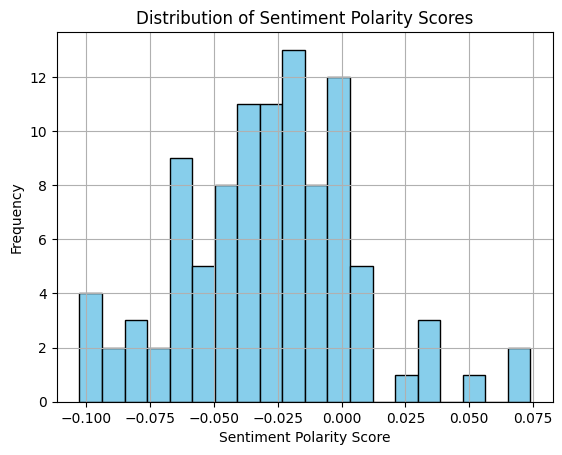

In [55]:
# plot histogram of sentiment polarity scores to analyze the distribution of the
# sentiment polarity score in the dataset
plt.hist(vi_text_file['sentiment_polarity_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [56]:
# coun the number of occurances of each sentiment label
sentiment_counts = vi_text_file['sentiment'].value_counts()

**To show the percentages on each bar:**
1. We calculate the total count by summing all the counts in the sentiment_counts Series.
2. We use this total count to compute the percentage of each sentiment label relative to the total count.
3. We annotate each bar with its correct percentage value, ensuring that the percentages sum up to 100%.

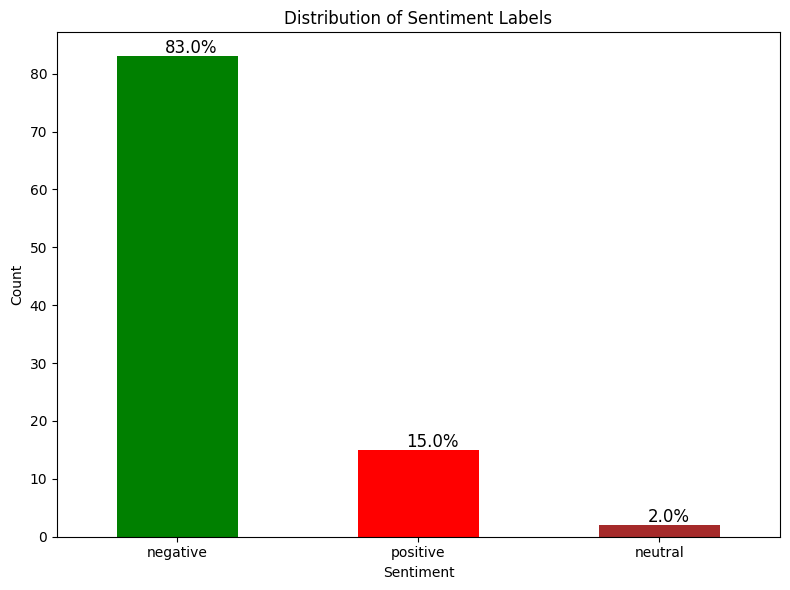

In [60]:
plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind='bar', color=['green', 'red', 'brown'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels

# Calculate total count
total = float(sum(sentiment_counts))

# Annotate each bar with its percentage value
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), size=12)

plt.tight_layout()
plt.show()

# Conclusion:
In the sample dataset of 100 records, we have 83% negative, 15% positive, and 2% neutral on the sentiment polarity score analysis.